In [1]:
import os
import torch
import numpy as np
os.chdir("/data/adv_geom/src")
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres
import matplotlib.pyplot as plt


In [2]:
# train_set, val_set, test_set = ConcentricSpheres.make_train_val_test_splits()


In [3]:
# plt.hist(train_set.normed_all_smooth_distances.numpy()[:, 0])
# plt.show()
# plt.plot(sorted(train_set.normed_all_smooth_distances.numpy()[:, 0]))
# plt.show()

In [4]:
data_dir = "/data/k500n500_noninfsmoothdist_data/"


train_set, val_set, test_set = ConcentricSpheres.load_splits(data_dir)


In [5]:
val_logits = torch.load("/azuredrive/deepimage/data1/t-achetan/adv_geom_dumps/dumps/expD_distlearner_against_adv_eg/rdm_concspheres/rdm_concspheres_k500n500_noninfdist/1/logits/val/logits.pt")
val_targets = torch.load("/azuredrive/deepimage/data1/t-achetan/adv_geom_dumps/dumps/expD_distlearner_against_adv_eg/rdm_concspheres/rdm_concspheres_k500n500_noninfdist/1/logits/val/targets.pt")





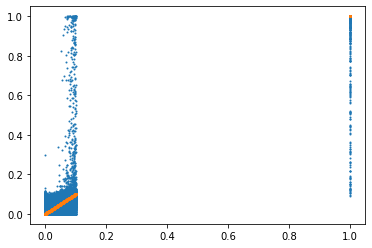

In [7]:
import matplotlib.pyplot as plt
plt.scatter(val_set.normed_all_actual_distances.numpy()[:, 1], val_logits.numpy()[:, 1], s=1)
plt.scatter(val_set.normed_all_actual_distances.numpy()[:, 1], val_set.normed_all_actual_distances.numpy()[:, 1], s=1)

plt.show()


Text(0.5, 1.0, 'k=500, n=500 noninf distance, error tol: 5e-2')

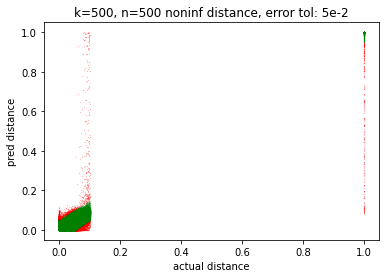

In [28]:
mask = np.abs(val_set.normed_all_actual_distances.numpy()[:, 0] - val_logits.numpy()[:, 0]) >= 5e-2
colors = ["red" if i is True else "green" for i in mask]
plt.scatter(val_set.normed_all_actual_distances.numpy()[mask, 0], val_logits.numpy()[mask, 0], s=0.01, c="red")
plt.scatter(val_set.normed_all_actual_distances.numpy()[np.logical_not(mask), 0], val_logits.numpy()[np.logical_not(mask), 0], s=0.01, c="green")
# plt.scatter(val_set.normed_all_smooth_distances.numpy()[:, 0], val_targets.numpy()[:, 0], s=1)
plt.xlabel("actual distance")
plt.ylabel("pred distance")
plt.title("k=500, n=500 noninf distance, error tol: 5e-2")


In [11]:
(np.abs(val_set.normed_all_smooth_distances.numpy()[:, 0] - val_logits.numpy()[:, 0]) >= 1e-2

76849

In [58]:
(np.abs(val_set.normed_all_smooth_distances.numpy()[:, 0] - val_logits.numpy()[:, 0]) >= 5e-2).shape

(200000,)

In [60]:
np.logical_not(mask)

array([False,  True,  True, ...,  True,  True,  True])

In [21]:
val_logits[:, 0][val_logits[:, 0] == 1] - val_set.normed_all_distances.numpy()[:, 0][val_logits[:, 0] == 1]

tensor([0.9300, 0.9300, 0.9300,  ..., 0.9300, 0.9300, 0.9300])

In [22]:
val_set.normed_all_distances.numpy()[:, 0][val_logits[:, 0] == 1]

array([0.07, 0.07, 0.07, ..., 0.07, 0.07, 0.07], dtype=float32)

In [25]:
((train_set.normed_all_actual_distances[:, 0] >= 0.09) & (train_set.normed_all_actual_distances[:, 0] <= 0.1)).sum()

tensor(25141)

In [28]:
(train_set.normed_all_actual_distances[:, 0] > 0.99).sum()

tensor(500000)

In [19]:
train_set.normed_all_actual_distances[:, 0].shape

torch.Size([1000000])

In [29]:
((train_set.normed_all_smooth_distances[:, 0] >= 0.09) & (train_set.normed_all_smooth_distances[:, 0] <= 0.99)).sum()

tensor(24890)